In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

C:\Users\Amanjot Singh\AppData\Local\Temp\ipykernel_3260\247412829.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("C:/Users/Amanjot Singh/Desktop/vgsales.csv")
df = df.dropna()
print("Columns:", df.columns)
print(df.head())

Columns: Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31

In [4]:
df['Is_Hit'] = df['Global_Sales'].apply(lambda x: 1 if x >= 1.0 else 0)

In [5]:
label_encoders = {}
categorical_columns = ['Platform', 'Genre', 'Publisher']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
features = ['Platform', 'Genre', 'Publisher']
target = 'Is_Hit'
X = df[features]
y = df[target]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=2)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("\nSelected Features by RFE:", list(selected_features))


Selected Features by RFE: ['Platform', 'Genre']


In [9]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train[selected_features], y_train)
y_pred = rf_clf.predict(X_test[selected_features])

In [10]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8818656029456888

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      2876
           1       0.48      0.07      0.12       383

    accuracy                           0.88      3259
   macro avg       0.69      0.53      0.53      3259
weighted avg       0.84      0.88      0.84      3259



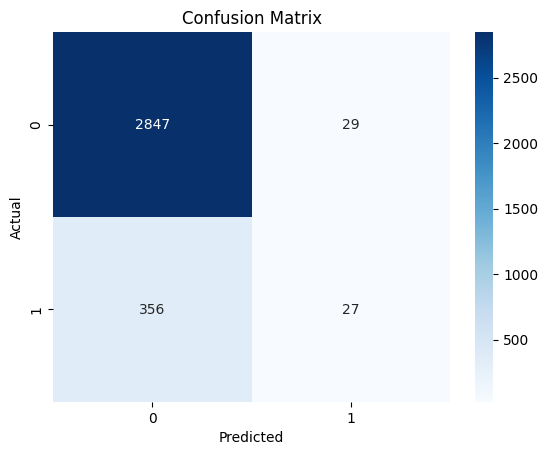

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

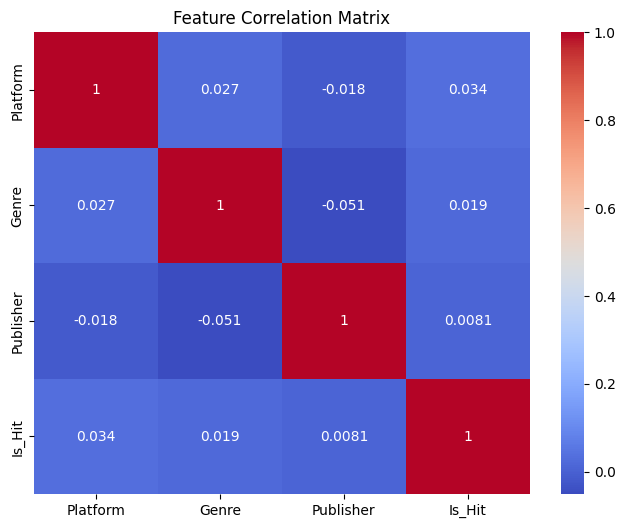

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df[features + ['Is_Hit']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()